In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from IPython.display import Audio

from scipy.io import wavfile
from scipy import signal
import librosa
import librosa.display

import warnings
warnings.filterwarnings("ignore")

# Data Importing & Preprocessing

In [2]:
directory_path = "../data/CREMA-D"
file_names = os.listdir(directory_path)

**Importing and Consolidating the CREMA-D dataset:**

In [3]:
# Creating an empty DataFrame with column names
df = pd.DataFrame(columns=['filename', 'author_id', 'sentence', 'emotion', 'intensity_level', 'sample_rate', 'audio_data'])

In [4]:
# Looping through each uploaded file to append to df

for idx, filename in enumerate(file_names):
    if filename.endswith('.wav'):

        # Extracting information from the filename
        file_parts = filename.split('_')
        author_id = file_parts[0]
        sentence = file_parts[1]
        emotion = file_parts[2]
        intensity_level = file_parts[3].split('.')[0]  # Removes '.wav' extension

        # Reading the audio file
        file_path = os.path.join(directory_path, filename)
        sample_rate, audio_data = wavfile.read(file_path)

        # Appending data to the empty DataFrame        
        df.loc[idx] = {
            'filename': filename,
            'author_id': author_id,
            'sentence': sentence,
            'emotion': emotion,
            'intensity_level': intensity_level,
            'sample_rate': sample_rate,
            'audio_data': audio_data
        }

---

# Exploratory Data Analysis

In [5]:
print(f'The shape of this dataframe is {df.shape}')
df.head(6)

The shape of this dataframe is (7442, 7)


,filename,author_id,sentence,emotion,intensity_level,sample_rate,audio_data
0,1022_ITS_ANG_XX.wav,1022,ITS,ANG,XX,16000,"[8, -41, -83, -96, -105, -125, -150, -160, -21..."
1,1037_ITS_ANG_XX.wav,1037,ITS,ANG,XX,16000,"[4, 3, 21, 15, -33, -28, -19, -14, -31, -22, -..."
2,1060_ITS_NEU_XX.wav,1060,ITS,NEU,XX,16000,"[77, 102, 107, 126, 136, 101, 72, 99, 70, 87, ..."
3,1075_ITS_NEU_XX.wav,1075,ITS,NEU,XX,16000,"[-76, -71, -131, -153, -158, -194, -174, -205,..."
4,1073_IOM_DIS_XX.wav,1073,IOM,DIS,XX,16000,"[-170, -192, -242, -242, -258, -284, -300, -28..."
5,1066_IOM_DIS_XX.wav,1066,IOM,DIS,XX,16000,"[41, 27, 38, 8, -8, -35, -22, -24, 23, 19, 36,..."


In [6]:
df.isnull().sum()

filename           0
author_id          0
sentence           0
emotion            0
intensity_level    0
sample_rate        0
audio_data         0
dtype: int64

In [7]:
df.dtypes

filename           object
author_id          object
sentence           object
emotion            object
intensity_level    object
sample_rate         int64
audio_data         object
dtype: object

In [8]:
df["sentence"].value_counts()

sentence
IEO    1456
IOM     546
IWL     546
TAI     546
TSI     546
DFA     546
IWW     546
ITS     545
TIE     545
MTI     540
WSI     540
ITH     540
Name: count, dtype: int64

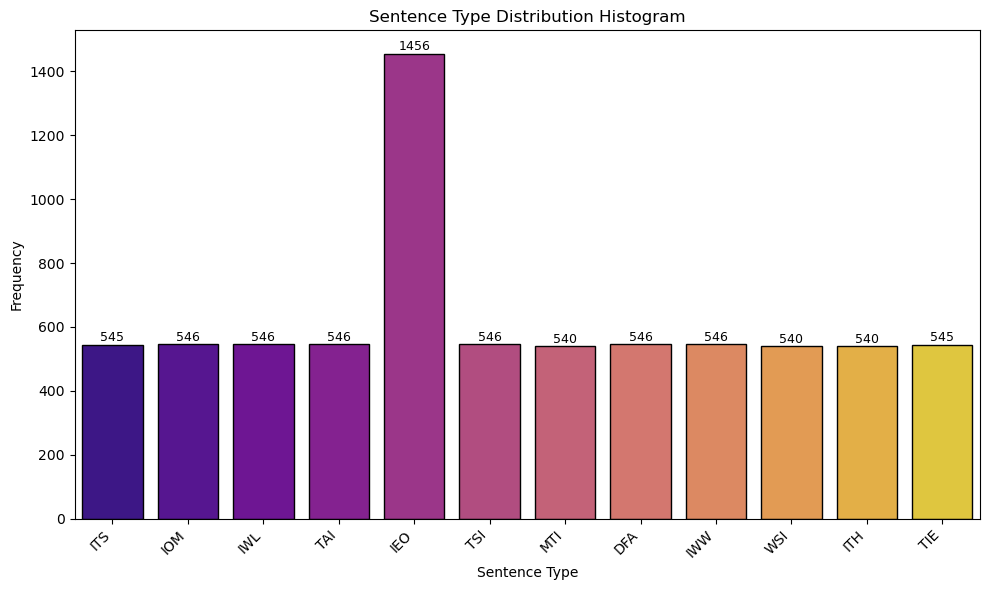

In [9]:
sentences = df['sentence']

# Create a histogram of sentence types with frequency counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=sentences, edgecolor='black', palette='plasma')  

# Labels & Title
plt.title('Sentence Type Distribution Histogram')
plt.xlabel('Sentence Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show frequency counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

- The histogram above shows the 12 sentence types that were spoken by actors in the CREMA-D datset and therefore represented in this dataframe. The most common sentence spoken was IEO, which standa for "It is eleven o'clock." 

In [10]:
df["emotion"].value_counts()

emotion
ANG    1271
DIS    1271
SAD    1271
FEA    1271
HAP    1271
NEU    1087
Name: count, dtype: int64

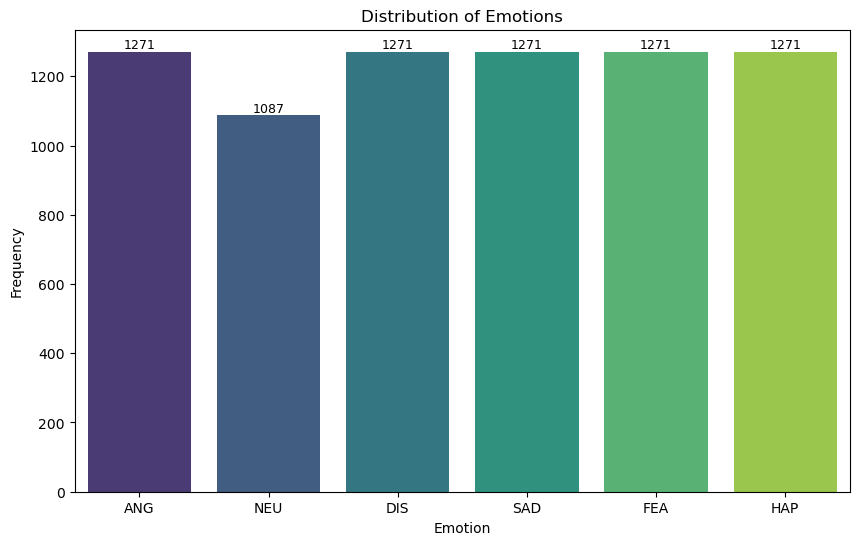

In [11]:
emotions = df['emotion']

# Create histogram using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='emotion', palette='viridis') 

# Labels & Title
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Distribution of Emotions')

# Show frequency counts above the bars as integers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

- This histogram shows the frequency of the .wav files by emotion: anger, neutrality, disgust, sadness, fear, and happiness. The overall count is presented above each bar chart category and all counts are between 1087 and 1271, indicating that the six categories are relatively balanced. 

In [12]:
df["intensity_level"].value_counts()

intensity_level
XX    6076
MD     455
HI     455
LO     455
X        1
Name: count, dtype: int64

In [13]:
# Correcting mislabelled 'X' to be 'XX'

df['intensity_level'] = df['intensity_level'].replace('X', 'XX')
df['intensity_level'].value_counts()

intensity_level
XX    6077
MD     455
HI     455
LO     455
Name: count, dtype: int64

In [14]:
# Group the data by both "emotion" and "intensity_level" and count occurrences
counts = df.groupby(['emotion', 'intensity_level']).size()

# Print the counts
print(counts)

emotion  intensity_level
ANG      HI                   91
         LO                   91
         MD                   91
         XX                  998
DIS      HI                   91
         LO                   91
         MD                   91
         XX                  998
FEA      HI                   91
         LO                   91
         MD                   91
         XX                  998
HAP      HI                   91
         LO                   91
         MD                   91
         XX                  998
NEU      XX                 1087
SAD      HI                   91
         LO                   91
         MD                   91
         XX                  998
dtype: int64


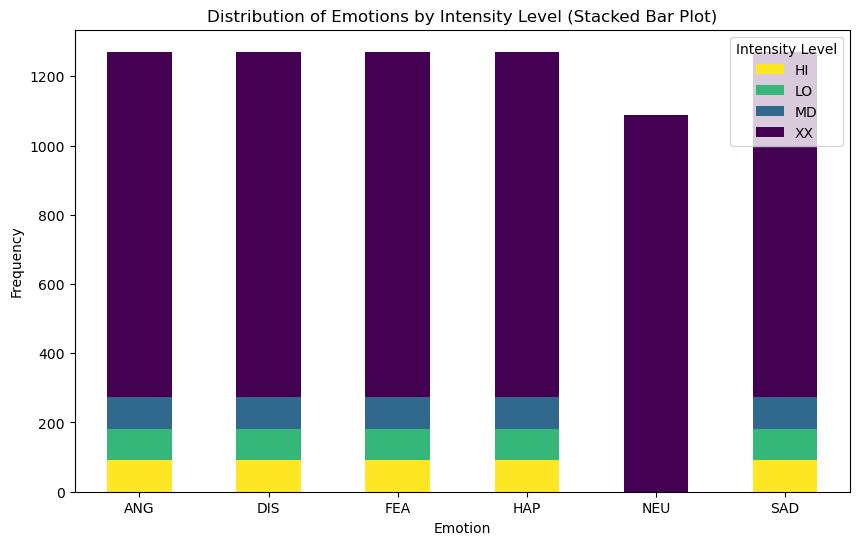

In [15]:
emo_intens = df[['emotion', 'intensity_level']]

counts = df.groupby(['emotion', 'intensity_level']).size().unstack(fill_value=0)

# Create a stacked bar plot
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis_r')

# Labels & Title
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Distribution of Emotions by Intensity Level (Stacked Bar Plot)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the legend
plt.legend(title='Intensity Level');

- This stacked bar plot is similar to the histogram above in that it categorizes each .wav file by emotion and shows its overall frequency. However, this chart decomposes each emotion by intensity level: high (HI), low (LO), medium (MD), and netural (XX). It is clear that the majority of each sentence is spoken with a neutral tone and that there are roughly even frequencies of low, medium, and high intensity sentences.

---

# Listening to Sample Audio Files

In [16]:
# Play a Sample Audio File of various sentence/emotion/intensity level combinations

audio_files = {
    'ieo_ang_hi': '1001_IEO_ANG_HI.wav',
    'dfa_hap_xx': '1082_DFA_HAP_XX.wav'
}

# Specify the directory where your audio files are located
directory_path = "../data/CREMA-D"

# Play one audio file from select categories
for category, audio_filename in audio_files.items():
    file_path = os.path.join(directory_path, audio_filename)
    display(Audio(file_path, autoplay=True))

- The first example is an audio file of the sentence "It's eleven o'clock," spoken with anger at a high intensity level.
- The second example is an udio file of the sentence "Don't forget a jacket," spoken with happiness at a neutral intensity level.

---

# Creating the Waveplots

In [17]:
# Define the directory in which to save the waveplot images
output_directory = "../plots/waveplots"

# Creating the Waveplot
def plot_waveplot(filename, display_plot = False):

  # Locate the row with the specified filename
  selected_row = df[df['filename'] == filename].iloc[0]

  # Extract information from the selected row
  audio = selected_row['audio_data']
  sample_rate = selected_row['sample_rate']
  emotion = selected_row['emotion']
  intensity_level = selected_row['intensity_level']

  # Create a time array for x-axis
  time = np.arange(0, len(audio)) / sample_rate

  # Create and display the waveplot
  plt.figure(figsize=(10, 3))
  plt.title('Waveplot for audio with {} emotion and {} intensity level'.format(emotion, intensity_level, size=15))
  plt.plot(time, audio)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')

  # Save the waveplot as an image in Google Drive directory
  image_filename = os.path.join(output_directory, '{}_waveplot.png'.format(filename.split('.wav')[0]))
  plt.savefig(image_filename)

  # Close the plot to avoid rendering all waveplot images in notebook
  if display_plot == False:
    plt.close()
  # Conditional plot if specified
  else:
    plt.show()

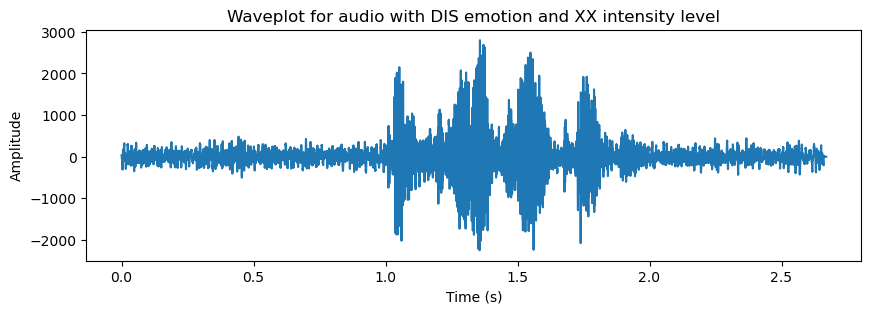

In [18]:
# Specify the filename of the audio you want to plot as a waveplot
plot_waveplot('1091_DFA_DIS_XX.wav', display_plot = True)

- The waveplot above is a graphical representation of a continuous audio waveform depicting how the amplitude (loudness) of an audio signal changes over time. The shape of the waveform can reveal characteristics of the audio. FOr example, while a pure sine wave will have a simple, smooth waveform, complex audio (such as speech) will produce more intricate and irregular waveforms, as demonstrated above. Frequency (aka: pitch) characteristics cannot be ascertained from the waveplot alone, and instead are conveyed through spectograms (or less commonly, frequency domain plots). Source: ChatGPT

In [ ]:
# Saving waveplots in batches to reduce kernal failures

batch_size = 500

unique_filenames = df['filename'].unique()

# Calculate number of batches needed
num_batches = int(np.ceil((len(unique_filenames) / batch_size)))

# Iterate through batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_filenames = unique_filenames[start_idx:end_idx]

    for filename in batch_filenames:
        plot_waveplot(filename, display_plot=False)

---

# Creating the Spectograms

- The function below creates 5 spectograms from each .wav file within the dataframe. The first spectogram transcribes the original audio file and the other four show distinct methods of data augmentation: noise, preemphasis, pitch-shift, and speed-change. Audio data augmentation is a technique used to extend and diversify my dataset by applying controlled transformations and modificatons to existing audio samples to combat overfitting and improve the ability of the CNN to generalize.

- ```Librosa``` is a python package used for music and audio analysis. Librosa was used for feature extraction to analyze each .wav file (shown below) and was also used to transform the original .wav files with effects such as time and frequency augmentations.

In [19]:
# Defining directories to save spectogram images:

base_output_directory = '../plots/spectograms'

def get_output_directory(filename):
    # Extract the third cluster of words from the filename which identifies the emotion
    filename_emotion = filename.split('_')[2]

    # Create the directory path based on the the emotion label
    output_directory = os.path.join(base_output_directory, filename_emotion)

    return output_directory

In [20]:
# Creating spectograms (unaugmented, Noise, Pre-emphasized, Pitch-Shifted, Speed-Changed)

def plot_spectogram(filename, display_title = False, display_plot = False):
  # Locate the row with the specified filename
  selected_row = df[df['filename'] == filename].iloc[0]

  # Extract information from the selected row
  data = selected_row['audio_data'].astype(np.float32)  # Convert data to float32
  sr = selected_row['sample_rate']
  emotion = selected_row['emotion']

  augmentation_types = ['none', 'noise', 'preemphasis', 'pitch', 'speed']

  for augmentation in augmentation_types:
      if augmentation == 'none':
          augmented_data = data
          augmentation_label = 'unaugmented'
      elif augmentation == 'noise':
          noise_level = 0.01  # Adjust noise level as desired
          noise = np.random.normal(0, scale=noise_level, size=len(data))
          augmented_data = data + noise
          augmentation_label = 'with noise'
      elif augmentation == 'preemphasis':
          augmented_data = librosa.effects.preemphasis(data)
          augmentation_label = 'preemphasized'
      elif augmentation == 'pitch':
          n_steps = 2  # Adjust pitch shift amount as desired
          augmented_data = librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)
          augmentation_label = 'pitch-shifted'
      elif augmentation == 'speed':
          rate = 1.2  # Adjust speed change rate as desired
          augmented_data = librosa.effects.time_stretch(data, rate=rate)
          augmentation_label = 'speed-changed'

      # Calculate the short-term Fourier transform for the data
      X = librosa.stft(augmented_data)
      Xdb = librosa.amplitude_to_db(abs(X))

      # Create and display the spectogram
      plt.figure(figsize=(12, 3))
      librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
      plt.colorbar()

      # Default display_title = False does not plot title (which indicated emotion)
      if not display_title:
        pass
      # Conditional title if specified
      else:
        plt.title('Spectogram for audio with {} emotion ({})'.format(emotion, augmentation_label), size=15)

      # Determine the output directory based on the filename
      output_directory = get_output_directory(filename)

      # Save the spectogram as an image in the specified directory
      image_filename = os.path.join(output_directory, '{}_spectogram_{}.png'.format(filename.split('.wav')[0], augmentation))
      plt.savefig(image_filename, bbox_inches='tight', pad_inches=0.1)

      # Close the plot to avoid rendering all spectogram images in the notebook
      if not display_plot:
          plt.close()
      # Conditional plot if specified
      else:
          plt.show()

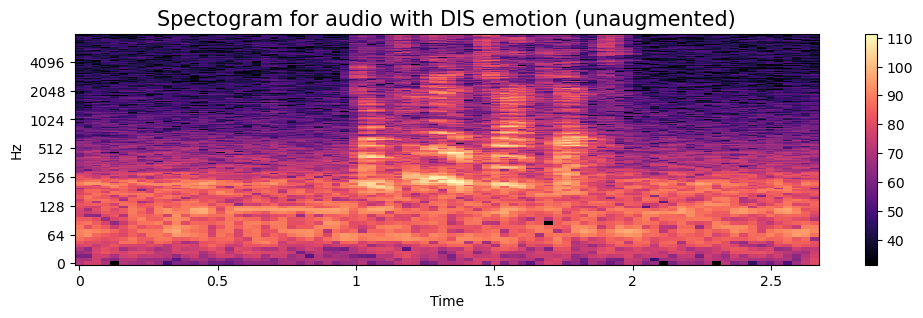

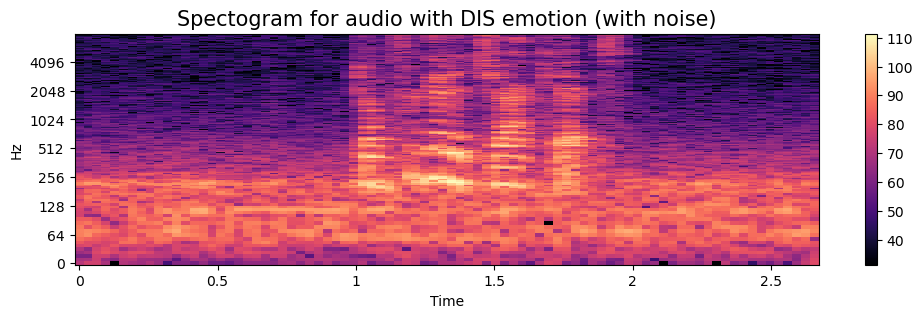

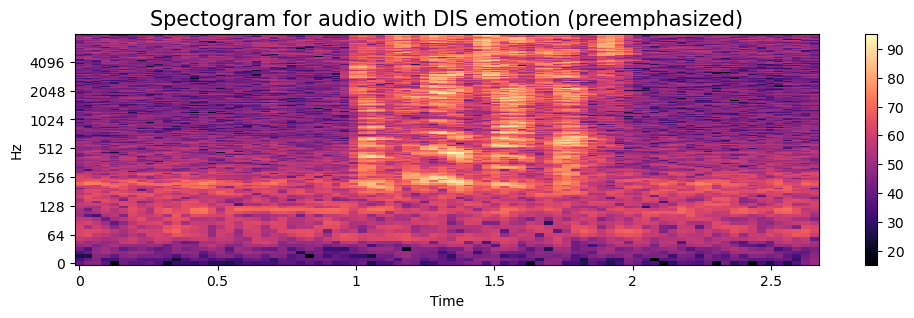

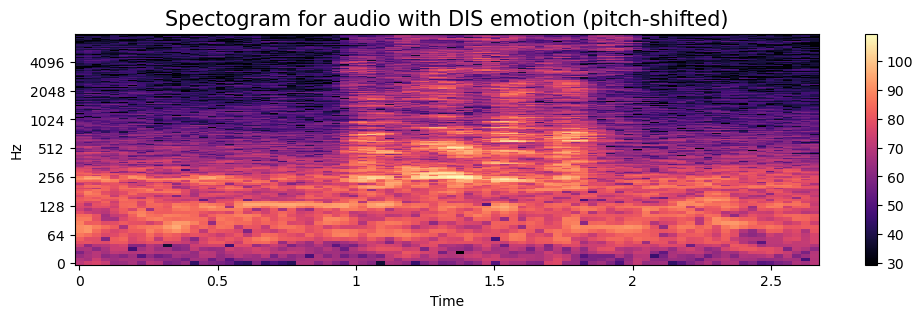

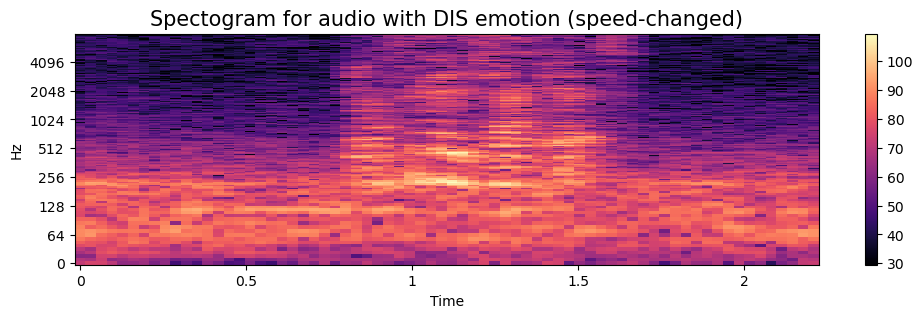

In [21]:
plot_spectogram('1091_DFA_DIS_XX.wav', display_title = True, display_plot = True)

- A spectogram is a 2-dimensional visual representation of the frequency content of a signal as it varies with time. The intensity or amplitude of each frequency component at a given point in time is represented by the color or brightness of the corresponding pixel in the spectogram. Bright regions indicate high intensity (loudness), while darker regions represent lower intensity. This intensity is also color mapped to help visualize the distribution of energy across different frequencies and over time. Source: ChatGPT
- These spectograms were plotted on a logarithmic frequency scale because this scale showed more color striation within the plots, allowing for added differentiation among images rendered for the CNN. In the unaugmented spectogram of plot 1, the 3 second audio sample contans frequencies which range from 0 Hz to upwards of4096 HZ ad show the most intensity between the 1 and 2 second mark (categorized by the bright yellow color).
- Various methods of data augmentaiton are included, including noise, preomphasis, pitch-shifting, and speed-changing.
    1. Adding Gaussian (random) noise is used to simulate anomolies as random or unwanted frequency components in the spectogram, which more closely mirrors audio data in real-world settings by making the data robust to noisy environments. The addition of Gaussian noise will alter the spectogram in that random variations in frequencies will appear within the plot.
    2. Adding preemphasis is a filtering technique that emphasizes higher frequences over lower frequencies by boosting the amplitude of the high-frequency components. Preemphasis can enhance high-frequency details in the spectogram, making certain features (such as consonants in soeech) more prominent, thereby potentially imporoving the model's ability to capture these details.
    3. Pitch-shifting involves changing the pitch of an audio signal while keeping its duration constant. This shifts the frequency content of the spectogram up or down and is helpful in generalizing the CNN model for variations in pitch.
    4. Speed changing, also known as time stretchin or compression, alters the duration of the audio signal while maintaining its pitch. This is done by resampling the signal at a different rate, and will elongate or compress the spectogram along the time axis.
- Source: ChatGPT

In [22]:
# Saving spectograms in batches to reduce kernal failures

unique_filenames = df['filename'].unique()

def process_batch(start_idx, end_idx):
    batch_filenames = unique_filenames[start_idx:end_idx]

    for filename in batch_filenames:
      plot_spectogram(filename, display_title = False, display_plot = False)

In [ ]:
process_batch(0, 1000)

In [ ]:
process_batch(1001, 2000)

In [ ]:
process_batch(2001, 3000)

In [ ]:
process_batch(3001, 4000)

In [ ]:
process_batch(4001, 5000)

In [ ]:
process_batch(5001, 6000)

In [ ]:
process_batch(6001, 7000)

In [ ]:
process_batch(7001, len(unique_filenames))

In [27]:
# Visualizing the 3D Spectogram

# Function to plot the 3D spectogram
def plot_3d_spectogram(audio_data, sample_rate):
    f, t, Sxx = signal.spectrogram(audio_data, fs=sample_rate) # Purposely labeled 'spectrogram' here and not 'spectogram' per Scipy convention.

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    T, F = np.meshgrid(t, f)

    surf = ax.plot_surface(T, F, 10 * np.log10(Sxx), cmap='magma')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_zlabel('Amplitude [dB]')

    # Add a color bar (vertical scale) to the right
    cbar = fig.colorbar(surf, ax=ax, pad=0.1, aspect=20)
    cbar.set_label('Amplitude [dB]')

    plt.title('3D Spectogram')
    plt.show()

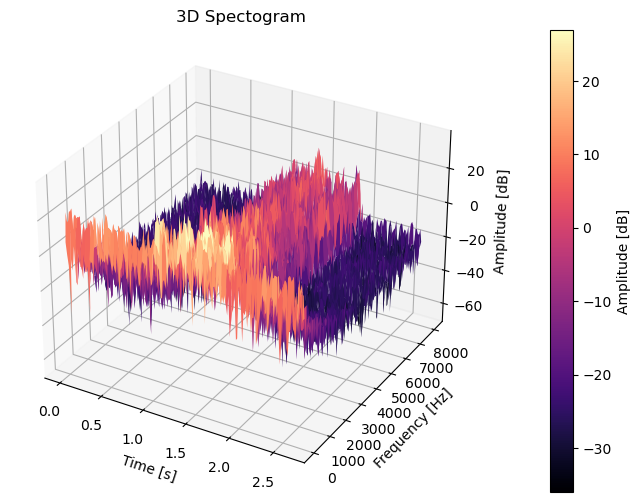

In [28]:
# Load the audio data and sample rate from the specified .wav file

sample = '../data/CREMA-D/1091_DFA_DIS_XX.wav'

sample_rate, audio_data = wavfile.read(sample)

# Plot the 3D spectogram
plot_3d_spectogram(audio_data, sample_rate)

The 3D spectogram plot displayed above visualizes how the intensity of different frequencies in the audio signal change over time. 

1. **X-Axis (Time):** The horizontal axis (X-axis) represents time in seconds. It shows the duration of the audio signal from the beginning to the end.

2. **Y-Axis (Frequency):** The vertical axis (Y-axis) represents frequency in Hertz (Hz). It shows the range of frequencies that the plot covers, typically from 0 Hz (the lowest frequency) to the Nyquist frequency (half the sampling rate), which is the highest frequency that can be represented in the audio.

3. **Z-Axis (Amplitude in dB):** The depth or Z-axis represents the amplitude of each frequency component at a specific time. It's typically represented in decibels (dB), which is a logarithmic scale used to measure the power or intensity of the signal. In a spectogram, the Z-axis often shows the intensity of each frequency component in dB.

4. **Color Mapping:** The colors on the spectogram represent the amplitude (intensity) of each frequency component. Darker colors (usually cooler colors like blue or purple) indicate lower amplitudes, while brighter colors (warmer colors like yellow or red) represent higher amplitudes.

Source: https://www.kaggle.com/code/davids1992/speech-representation-and-data-exploration, ChatGPT

---

# Audio Signal Feature Extraction

- The following audio signal features are extracted for potential use in K-Means clustering models for potential further analysis. These features can be inputed into other unsupervised learning models and be combined with the results of the CNN with ensemble learning. 

In [29]:
# Putting each feature in a new column for the df

# Define the audio feature names
feature_names = ['rms', 'scv', 'sbv', 'sfv', 'srv', 'tcv', 'mzcr']

# Initialize dictionaries to store feature values
feature_values = {feature_name: [] for feature_name in feature_names}

for audio_sample in df['audio_data']:
    # Convert the NumPy array to floating-point
    audio_sample = audio_sample.astype(float)

    # Root Mean Squared Value
    rms = librosa.feature.rms(y=audio_sample)
    feature_values['rms'].append(rms)

    # Spectral Centroid
    scv = librosa.feature.spectral_centroid(y=audio_sample)
    feature_values['scv'].append(scv)

    # Spectral Bandwidth Values
    sbv = librosa.feature.spectral_bandwidth(y=audio_sample)
    feature_values['sbv'].append(sbv)

    # Spectral Flatness
    sfv = librosa.feature.spectral_flatness(y=audio_sample)
    feature_values['sfv'].append(sfv)

    # Spectral Rolloff
    srv = librosa.feature.spectral_rolloff(y=audio_sample)
    feature_values['srv'].append(srv)

    # Tonal Centroid
    tc = librosa.feature.tonnetz(y=audio_sample)
    feature_values['tcv'].append(tc)

    # Mean Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio_sample))
    feature_values['mzcr'].append(zcr)

# Add the feature values as new columns to the DataFrame
for feature_name in feature_names:
    df[feature_name] = feature_values[feature_name]

In [30]:
csv_path = '../code/df.csv' 
df.to_csv(csv_path, index=False)